## Benchmarking a simple torch program with different numbers of threads


In [12]:
import torch

In [13]:
import platform
import psutil
print(platform.platform())
print("Physical cores:", psutil.cpu_count(logical=False))
print("Total cores:", psutil.cpu_count(logical=True))

Darwin-19.4.0-x86_64-i386-64bit
Physical cores: 6
Total cores: 12


In [14]:
print(torch.__config__.parallel_info())

ATen/Parallel:
	at::get_num_threads() : 1
	at::get_num_interop_threads() : 6
OpenMP not found
Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for Intel(R) 64 architecture applications
	mkl_get_max_threads() : 48
Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
std::thread::hardware_concurrency() : 12
Environment variables:
	OMP_NUM_THREADS : [not set]
	MKL_NUM_THREADS : [not set]
ATen parallel backend: OpenMP



In [15]:
# taken from https://pytorch.org/docs/master/notes/cpu_threading_torchscript_inference.html
import timeit

runtimes = []
cpu_percent = []
threads = [1] + [t for t in range(2, 49, 2)]

for t in threads:
    torch.set_num_threads(t)
    r = timeit.timeit(setup = "import torch; x = torch.randn(1024, 1024); y = torch.randn(1024, 1024)", stmt="torch.mm(x, y)", number=100)
    cpu_percent.append(psutil.cpu_percent())
    runtimes.append(r)

In [16]:
print(torch.__config__.parallel_info())

ATen/Parallel:
	at::get_num_threads() : 1
	at::get_num_interop_threads() : 6
OpenMP not found
Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for Intel(R) 64 architecture applications
	mkl_get_max_threads() : 48
Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
std::thread::hardware_concurrency() : 12
Environment variables:
	OMP_NUM_THREADS : [not set]
	MKL_NUM_THREADS : [not set]
ATen parallel backend: OpenMP



In [17]:
import matplotlib.pyplot as plt

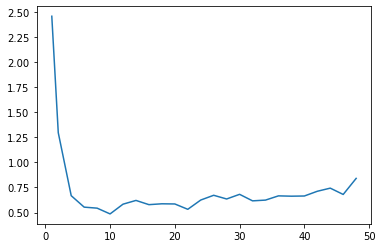

In [18]:
plt.plot(threads, runtimes)

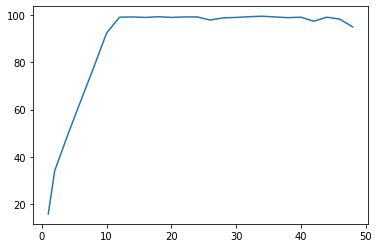

In [19]:
plt.plot(threads, cpu_percent)

In [20]:
runtimes

[2.4562302330014063,
 1.2956155319989193,
 0.6680212060018675,
 0.5539402289869031,
 0.5438785490114242,
 0.48642785199626815,
 0.5835351720015751,
 0.6208253410004545,
 0.5787259600037942,
 0.5873188109981129,
 0.5855868579965318,
 0.5323597910028184,
 0.6247467950015562,
 0.672157528999378,
 0.6352957229973981,
 0.6815902160014957,
 0.6166454379999777,
 0.6241052400000626,
 0.6662912689935183,
 0.663099280995084,
 0.6649316519906279,
 0.7120812030043453,
 0.74328260999755,
 0.6804484390013386,
 0.8403512340009911]

In [21]:
threads

[1,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48]

In [22]:
cpu_percent

[16.0,
 34.3,
 49.3,
 63.6,
 77.7,
 92.3,
 99.0,
 99.1,
 98.9,
 99.2,
 98.9,
 99.1,
 99.1,
 97.8,
 98.7,
 98.9,
 99.2,
 99.4,
 99.1,
 98.8,
 99.0,
 97.3,
 99.0,
 98.2,
 94.9]